# **The Data**
I will be using a subset of the Empower FinTech DataSet obtained from Mr. Li Li (Head of Data Science) for interview purposes

Empower is a high-growth financial technology company on a mission to expand access to fair credit to give anyone in the world the opportunity to improve their financial security and mobility. We dream up and launch one-of-a-kind features that help our members get money instantly whenever they need it, save for the future, and rewrite their financial story. Our members see Empower Cash Advance as a life-saver, Empower Automatic Savings as a game-changer, and the new Empower Thrive line of credit as a lifeline to low-cost borrowing and the only practical path to building good credit.

Empower is backed by Sequoia Capital, Blisce, and Icon Ventures. Are we the next great place to grow your impact and accelerate your career? We think so:

Inc. ranked Empower #56 in the 2023 Inc. 5000 list of the fastest-growing private companies in the US (#55 in 2022). Forbes put Empower on its 2023 list of America's Best Startup Employers. Fast Company recognized the new Empower Thrive line of credit in their 2022 list of the Next Big Things in Tech.

# **Goal**
The goal of the project is to build a model to predict column A (initial cash advance defaults).  0 is a successful payment, and 1 is a default.  You can use existing variables or come up with any transformations you think are valuable.  For this exercise, the team would like me to focus on building an end to end model vs chasing optimal performance / AUC.  

## **Steps Undertaken**

**SECTION 1:** DATA INSPECTION

**SECTION 2:** EXPLORATORY DATA ANALYSIS

**SECTION 3:** FEATURE ENGINEERING

**SECTION 4:** TRAIN-TEST-SPLIT AND DATA CLEANSING

**SECTION 5:** MODEL CREATION | MULTIPLE CANDIDATE MODELS

**SECTION 6:** MODEL CREATION | USING KERAS

**SECTION 7:** MODEL EVALUATION




# ****SECTION 1: DATA INSPECTION****

# **1. Importing necessary libraries and reading the file**

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model

In [ ]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread

In [ ]:
uploaded = files.upload()
for filename in uploaded.keys():
    print('Uploaded file "{filename}"'.format(filename=filename))

Saving Project_Interview_Advance_Data.xlsx to Project_Interview_Advance_Data (3).xlsx
Uploaded file "Project_Interview_Advance_Data (3).xlsx"


In [ ]:
df = pd.read_excel(filename)

In [ ]:
print(df.head())

   DefaultedAdvances  AdvanceAmount  CurrentBalance  LatefeesTotalCount  \
0                  0             50          268.10                   0   
1                  0             50           17.68                   0   
2                  0             50            0.79                   0   
3                  0             50          -12.83                   0   
4                  0             50           55.88                   0   

   CreditAccounts  LastRepaymentAmount  OverdraftCount  OverdraftTotal  \
0               0                  0.0               0               0   
1               0                  0.0               0               0   
2               0                  0.0               0               0   
3               0                  0.0               0               0   
4               0                  0.0               0               0   

   AverageMonthlySpend  BalanceAverage  ...  Bal450  Bal350  Bal250  \
0         -5491.060000          3

# **2. Checking the shape, size and other details of our dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   DefaultedAdvances                               11808 non-null  int64  
 1   AdvanceAmount                                   11808 non-null  int64  
 2   CurrentBalance                                  8748 non-null   float64
 3   LatefeesTotalCount                              11808 non-null  int64  
 4   CreditAccounts                                  11808 non-null  int64  
 5   LastRepaymentAmount                             11808 non-null  float64
 6   OverdraftCount                                  11808 non-null  int64  
 7   OverdraftTotal                                  11808 non-null  int64  
 8   AverageMonthlySpend                             11808 non-null  float64
 9   BalanceAverage                         

In [ ]:
df.shape

(11808, 39)

In [ ]:
df.columns

Index(['DefaultedAdvances', 'AdvanceAmount', 'CurrentBalance',
       'LatefeesTotalCount', 'CreditAccounts', 'LastRepaymentAmount',
       'OverdraftCount', 'OverdraftTotal', 'AverageMonthlySpend',
       'BalanceAverage', 'BalanceMin', 'TotalAssets',
       'AverageNumberOfTransactionsADay', 'TotalCash', 'LatefeesCount',
       'Paycheck', 'TotalHistoryInDays', 'AverageMonthlyIncome',
       'AverageMonthlyDiscretionarySpend', 'CheckingAccountCount',
       'CreditAccountCount', 'SavingsAccountCount',
       'OutstandingCreditDebtWherePayingInterest',
       'AverageNumberOfTransactionsADayPrimaryChecking',
       'SuspiciousTransactionCount', 'NegativeBalanceCount', 'Bal4100',
       'Bal3100', 'Bal2100', 'Bal450', 'Bal350', 'Bal250', 'PaycheckModelUsed',
       'NumberOfMatches', 'ErrorRate', 'IsNameBased',
       'BalanceAbove100L30Count', 'AveragePotentialMonthlyIncome',
       'HasEmpowerBanking'],
      dtype='object')

# **3. Assessing missing values**

In [ ]:
#Check out what percentage of values are missing for each column. We can do this by simply
#dividing the missing value count for each column by the total number of rows in our dataframe
100*df.isnull().sum()/len(df)

,0
DefaultedAdvances,0.000000
AdvanceAmount,0.000000
CurrentBalance,25.914634
LatefeesTotalCount,0.000000
CreditAccounts,0.000000
LastRepaymentAmount,0.000000
OverdraftCount,0.000000
OverdraftTotal,0.000000
AverageMonthlySpend,0.000000
BalanceAverage,0.000000


~2.4% values in the ErrorRate, NumberOfMatches and IsNameBased columns are missing

**ErrorRate** | Number of errors in the paycheck sequence (e.g., instances where paycheck is a day early or late)

**IsNameBased** | Does the paycheck series we detect have matching names

**NumberOfMatches** | The number of matching paychecks in a sequence we detect (e.g., same employer, same timeframe)

~25% of the values in the CurrentBalance column are missing

 **CurrentBalance** | Balance on the user's primary checking account at the time of the cash advance

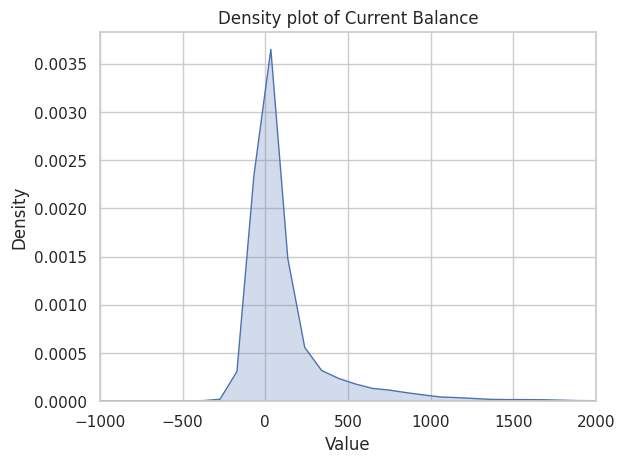

In [ ]:
# Plotting a density plot
sns.kdeplot(df['CurrentBalance'], fill=True)
plt.title('Density plot of Current Balance')
plt.xlabel('Value')
plt.ylabel('Density')

# Set the upper limit of the x-axis
plt.xlim(right=2000)
plt.xlim(left=-1000)
plt.show()

In [ ]:
df['CurrentBalance'].fillna(df['CurrentBalance'].median(), inplace=True)

<ipython-input-282-c0875808cbd2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CurrentBalance'].fillna(df['CurrentBalance'].median(), inplace=True)


In [ ]:
df['CurrentBalance'].isnull().sum()

0

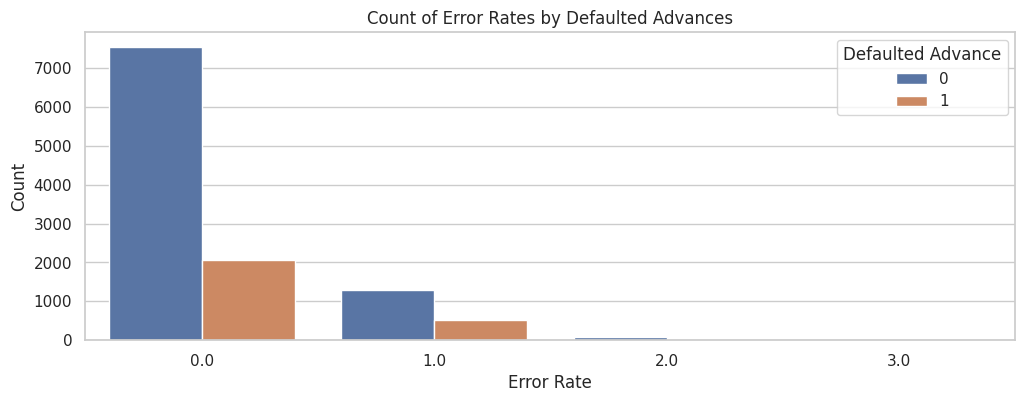

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(x='ErrorRate', data=df, hue='DefaultedAdvances')
plt.title('Count of Error Rates by Defaulted Advances')
plt.xlabel('Error Rate')
plt.ylabel('Count')
plt.legend(title='Defaulted Advance')
plt.show()

This still doesn't really inform me if there is a strong relationship between Error Rate and defaulting on the advances, what I want is the percentage of default advances per error rate category. Essentially informing us what percent of people per error rate category defaulted on their advances.

In [ ]:
df['DefaultedAdvances'] = df['DefaultedAdvances'].astype(str)

In [ ]:
#For initial cash advance defaults in this dataset, 0 = successful payment, 1 = default
er_da_0 = df[df['DefaultedAdvances']=="0"].groupby("ErrorRate").count()['DefaultedAdvances']
er_da_1 = df[df['DefaultedAdvances']=="1"].groupby("ErrorRate").count()['DefaultedAdvances']

In [ ]:
error_len = er_da_1/er_da_0

In [ ]:
error_len

,DefaultedAdvances
ErrorRate,
0.0,0.273607
1.0,0.409938
2.0,0.243590
3.0,NaN


<Axes: xlabel='ErrorRate'>

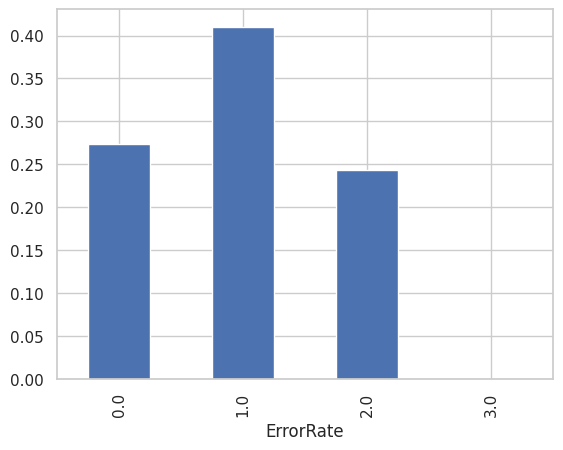

In [ ]:
error_len.plot(kind='bar')

**Cash advance default rates are not similar across all employment lengths. So we don't drop the error rate column. Instead, we replace the missing values with the Most Frequent Value**



In [ ]:
df['ErrorRate'].fillna(df['ErrorRate'].mode().iloc[0], inplace=True)

<ipython-input-290-1ae046ff7611>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ErrorRate'].fillna(df['ErrorRate'].mode().iloc[0], inplace=True)


In [ ]:
print(df['ErrorRate'].isnull().sum())

0


**A similar process can be adopted for isnamebased**

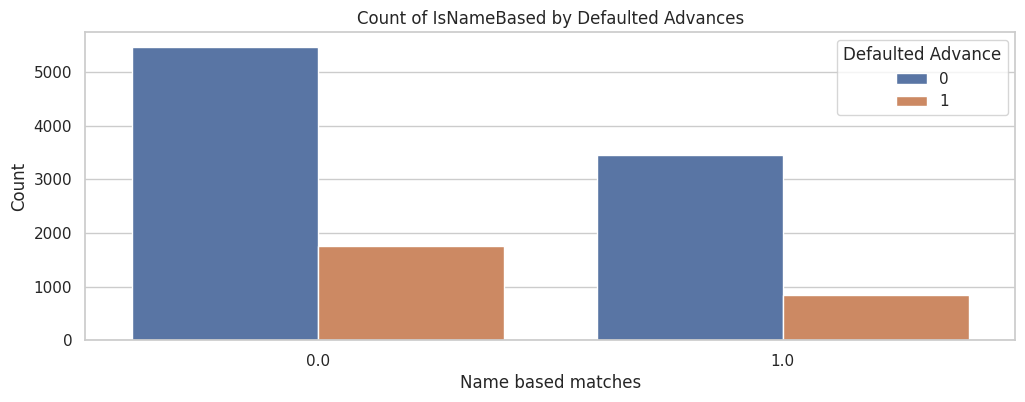

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(x='IsNameBased', data=df, hue='DefaultedAdvances')
plt.title('Count of IsNameBased by Defaulted Advances')
plt.xlabel('Name based matches')
plt.ylabel('Count')
plt.legend(title='Defaulted Advance')
plt.show()

In [ ]:
#For initial cash advance defaults in this dataset, 0 = successful payment, 1 = default
inb_da_0 = df[df['DefaultedAdvances']=="0"].groupby("IsNameBased").count()['DefaultedAdvances']
inb_da_1 = df[df['DefaultedAdvances']=="1"].groupby("IsNameBased").count()['DefaultedAdvances']

In [ ]:
name_based_len = inb_da_1/inb_da_0
name_based_len

,DefaultedAdvances
IsNameBased,
0.0,0.322108
1.0,0.246448


<Axes: xlabel='IsNameBased'>

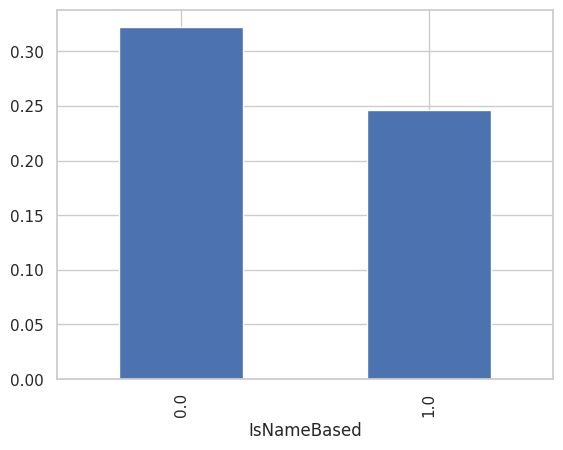

In [ ]:
name_based_len.plot(kind='bar')

**Cash advance default rates are not similar across name based matches. So we don't drop the IsNameBased column but replace the missing values with the most frequently occuring value**

In [ ]:
df['IsNameBased'].fillna(df['IsNameBased'].mode().iloc[0], inplace=True)
df['NumberOfMatches'].fillna(df['NumberOfMatches'].mode().iloc[0], inplace=True)
df['PaycheckModelUsed'].fillna(df['PaycheckModelUsed'].mode().iloc[0], inplace=True)

<ipython-input-296-5ea863f36e72>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IsNameBased'].fillna(df['IsNameBased'].mode().iloc[0], inplace=True)
<ipython-input-296-5ea863f36e72>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
df.isnull().sum()

,0
DefaultedAdvances,0
AdvanceAmount,0
CurrentBalance,0
LatefeesTotalCount,0
CreditAccounts,0
LastRepaymentAmount,0
OverdraftCount,0
OverdraftTotal,0
AverageMonthlySpend,0
BalanceAverage,0


In [ ]:
#On visual inspection, the columns CreditAccounts and CreditAccountCount looked equal - check for the same
df['CreditAccounts'].equals(df['CreditAccountCount'])

True

In [ ]:
df = df.drop('CreditAccounts', axis=1)

**Visually inspecting the data, it was found that Number of high risk transactions (e.g., check returns) was 0 for all records - hence we can drop the SuspiciousTransactionCount column as well**

In [ ]:
df = df.drop('SuspiciousTransactionCount', axis=1)

# **SECTION 2: EXPLORATORY DATA ANALYSIS**

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**

<Axes: xlabel='PaycheckModelUsed', ylabel='count'>

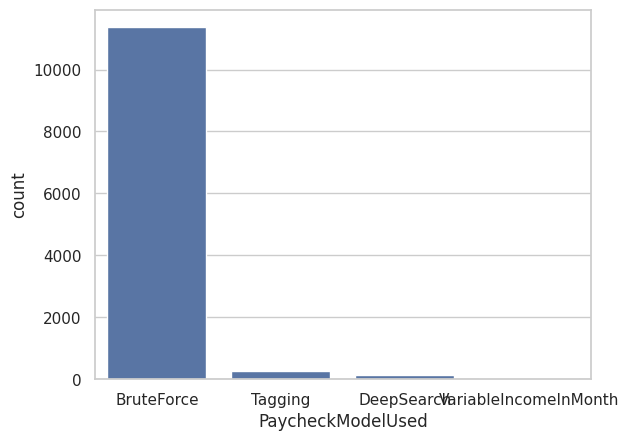

In [ ]:
sns.countplot(x='PaycheckModelUsed',data=df)

<ipython-input-302-f71deb42793f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PaycheckModelUsed', y='BalanceAverage', data=df, palette='Blues')


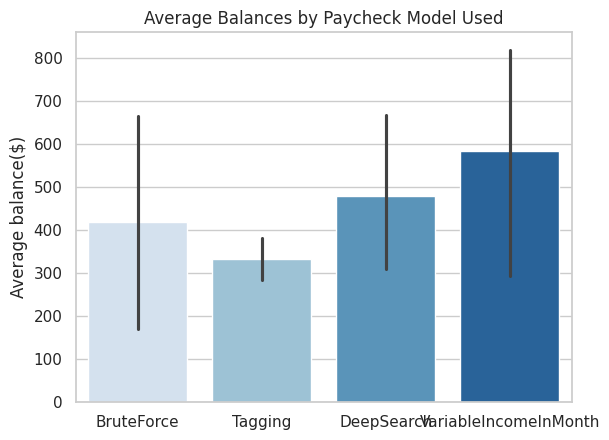

In [ ]:
#Average Balance is defined as Average balance on external checking acocunt
sns.barplot(x='PaycheckModelUsed', y='BalanceAverage', data=df, palette='Blues')
plt.xlabel('')
plt.ylabel('Average balance($)')
plt.title('Average Balances by Paycheck Model Used')
plt.show()

<ipython-input-303-49a71ff31848>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PaycheckModelUsed', y='CurrentBalance', data=df, palette='viridis')


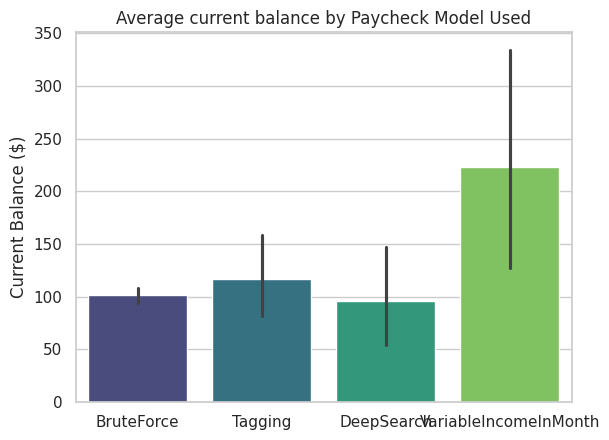

In [ ]:
#Current balance is defined as Balance on the user's primary checking account at the time of the cash advance
sns.barplot(x='PaycheckModelUsed', y='CurrentBalance', data=df, palette='viridis')
plt.xlabel('')
plt.ylabel('Current Balance ($)')
plt.title('Average current balance by Paycheck Model Used')
plt.show()

<ipython-input-304-1c19099c0463>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AverageMonthlySpend'],kde=False,bins=200)


(0.0, -20000.0)

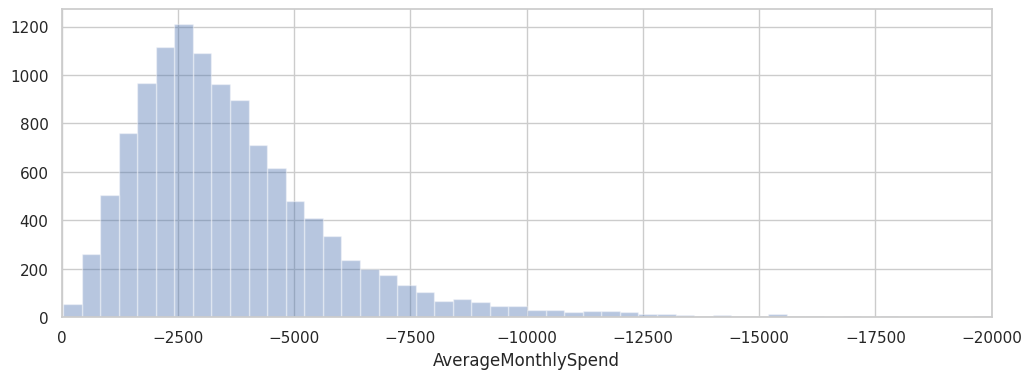

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df['AverageMonthlySpend'],kde=False,bins=200)
plt.xlim(0,-20000)

<ipython-input-305-0915c15b549f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AverageMonthlyIncome'],kde=False,bins=200)


(0.0, 20000.0)

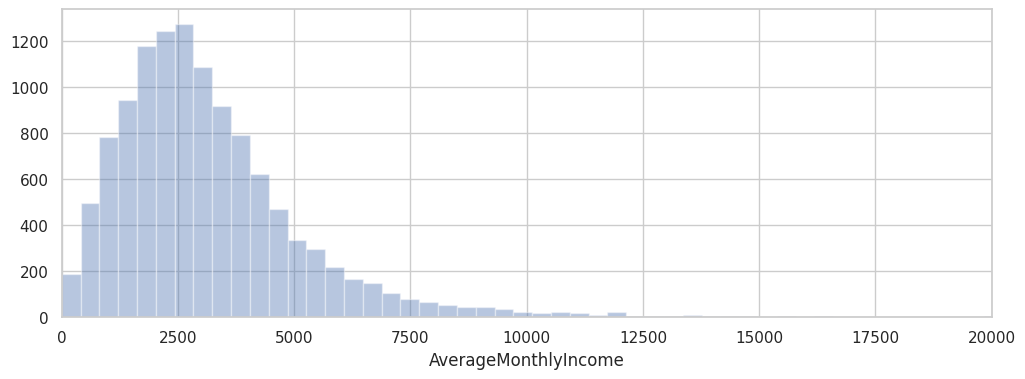

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df['AverageMonthlyIncome'],kde=False,bins=200)
plt.xlim(0,20000)

<Axes: xlabel='DefaultedAdvances', ylabel='count'>

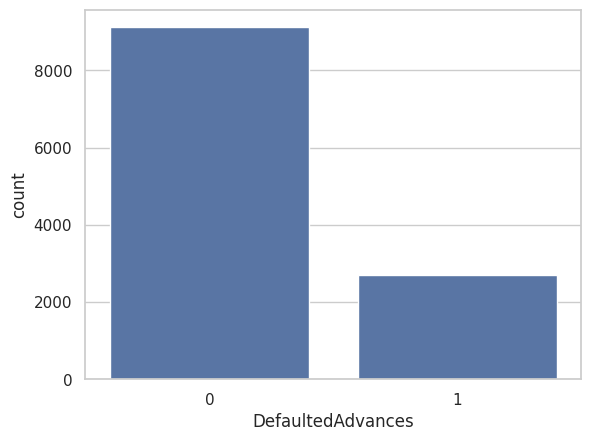

In [ ]:
sns.countplot(x='DefaultedAdvances',data=df)

<Axes: xlabel='HasEmpowerBanking', ylabel='count'>

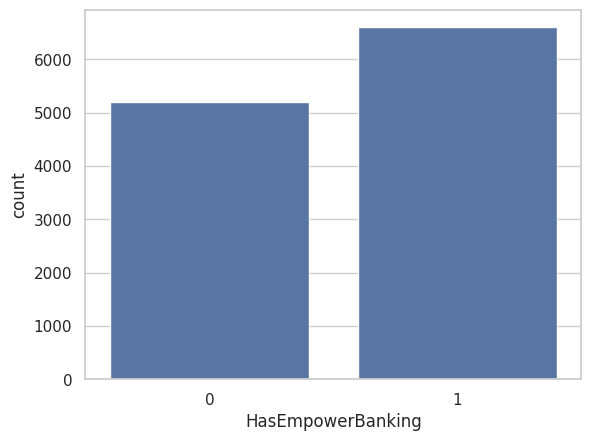

In [ ]:
sns.countplot(x='HasEmpowerBanking',data=df)

<Axes: xlabel='CreditAccountCount'>

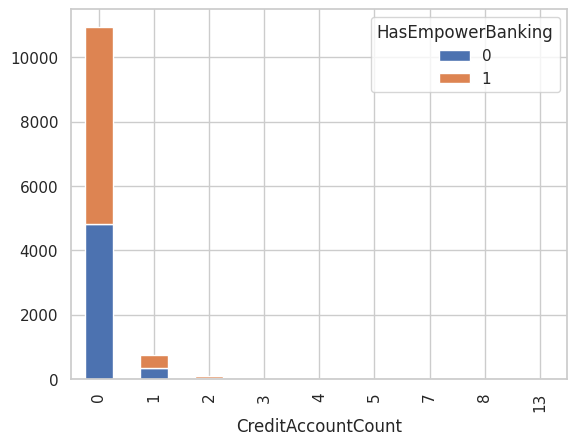

In [ ]:
pd.crosstab(df['CreditAccountCount'],df['HasEmpowerBanking']).plot.bar(stacked=True)

<Axes: xlabel='SavingsAccountCount'>

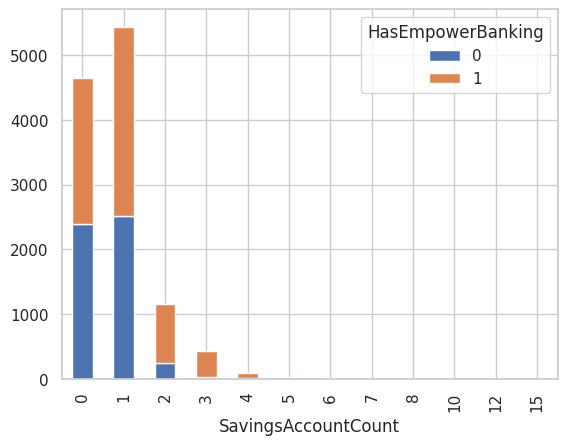

In [ ]:
pd.crosstab(df['SavingsAccountCount'],df['HasEmpowerBanking']).plot.bar(stacked=True)

<Axes: xlabel='CheckingAccountCount'>

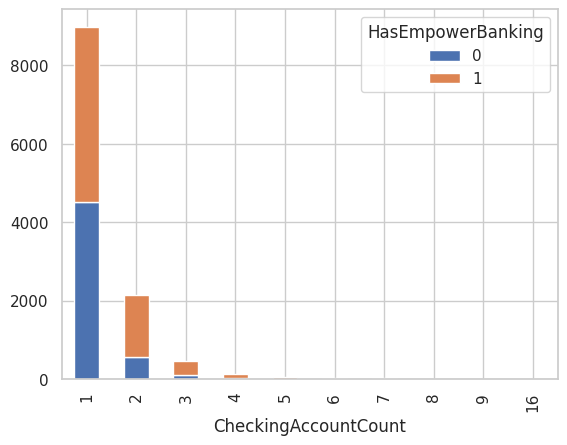

In [ ]:
pd.crosstab(df['CheckingAccountCount'],df['HasEmpowerBanking']).plot.bar(stacked=True)

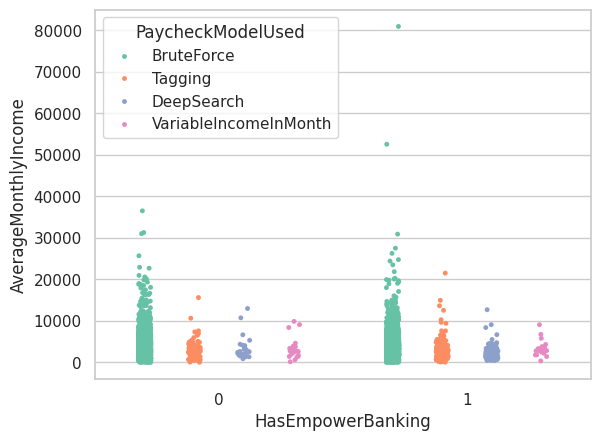

In [ ]:
sns.set(style = 'whitegrid')
sns.stripplot(x="HasEmpowerBanking", y="AverageMonthlyIncome", hue='PaycheckModelUsed', dodge=True, palette='Set2', s=3.5, data=df)
plt.show()

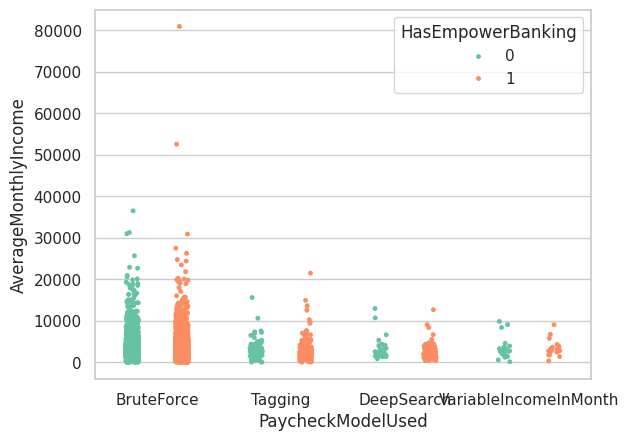

In [ ]:
sns.set(style = 'whitegrid')
sns.stripplot(x="PaycheckModelUsed", y="AverageMonthlyIncome", hue='HasEmpowerBanking', dodge=True, palette='Set2', s=3.5, data=df)
plt.show()

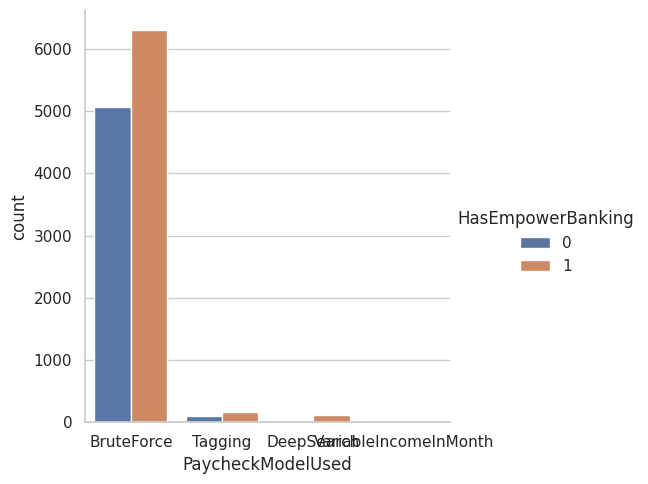

In [ ]:
sns.catplot(x='PaycheckModelUsed',hue='HasEmpowerBanking', data=df, kind="count")

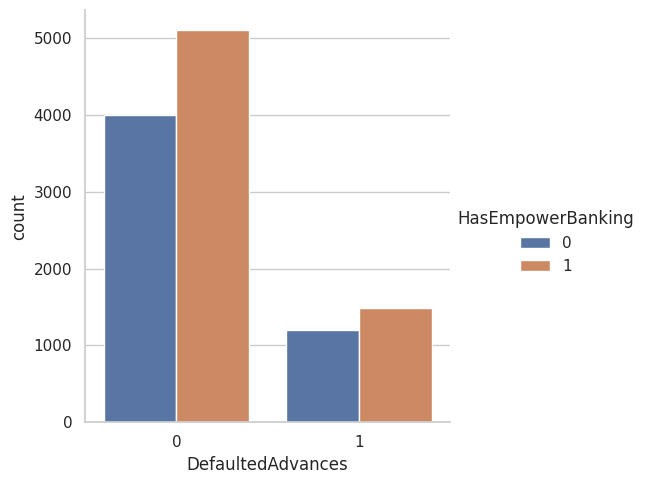

In [ ]:
sns.catplot(x='DefaultedAdvances',hue='HasEmpowerBanking', data=df, kind="count")

In [ ]:
df['PaycheckModelUsed'].replace(['BruteForce','DeepSearch','None','Tagging', 'VariableIncomeInMonth'],[0, 1, 2, 3, 4],inplace=True)

<ipython-input-315-8a1f20a88107>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PaycheckModelUsed'].replace(['BruteForce','DeepSearch','None','Tagging', 'VariableIncomeInMonth'],[0, 1, 2, 3, 4],inplace=True)
<ipython-input-315-8a1f20a88107>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['

In [ ]:
df.corr()

,DefaultedAdvances,AdvanceAmount,CurrentBalance,LatefeesTotalCount,LastRepaymentAmount,OverdraftCount,OverdraftTotal,AverageMonthlySpend,BalanceAverage,BalanceMin,...,Bal450,Bal350,Bal250,PaycheckModelUsed,NumberOfMatches,ErrorRate,IsNameBased,BalanceAbove100L30Count,AveragePotentialMonthlyIncome,HasEmpowerBanking
DefaultedAdvances,1.000000,NaN,-0.061302,-0.028411,-0.027372,-0.037082,-0.069752,0.122926,-0.025793,-0.016307,...,-0.097799,-0.108444,-0.124680,0.022072,-0.099864,0.051672,-0.054431,-0.111726,-0.073448,-0.005704
AdvanceAmount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentBalance,-0.061302,NaN,1.000000,0.008379,0.100415,0.015318,0.013387,-0.123077,0.016371,-0.004792,...,0.223996,0.231842,0.255889,0.013612,0.032956,-0.019787,0.018304,0.104403,0.114488,-0.000828
LatefeesTotalCount,-0.028411,NaN,0.008379,1.000000,0.088511,0.043634,0.107161,-0.072344,0.002467,0.001071,...,0.013282,0.014538,0.026468,-0.003277,0.010400,-0.017821,0.003269,-0.002127,-0.003828,-0.003631
LastRepaymentAmount,-0.027372,NaN,0.100415,0.088511,1.000000,0.009927,0.010302,-0.091797,0.004460,0.000945,...,0.021623,0.018329,0.026740,-0.002185,-0.000995,-0.020520,0.001510,0.017439,0.100012,0.009136
OverdraftCount,-0.037082,NaN,0.015318,0.043634,0.009927,1.000000,0.661046,-0.190405,0.014958,-0.016078,...,-0.097219,-0.087554,-0.050901,0.006720,0.101070,-0.042852,0.017892,-0.076555,0.072575,0.007820
OverdraftTotal,-0.069752,NaN,0.013387,0.107161,0.010302,0.661046,1.000000,-0.200496,0.005143,-0.016134,...,-0.045922,-0.031692,-0.000391,-0.001513,0.091986,-0.047915,0.022930,-0.053151,0.061948,-0.001029
AverageMonthlySpend,0.122926,NaN,-0.123077,-0.072344,-0.091797,-0.190405,-0.200496,1.000000,-0.016484,0.035382,...,-0.125917,-0.134128,-0.138709,0.017092,-0.120403,0.056102,-0.052916,-0.145288,-0.513210,0.052514
BalanceAverage,-0.025793,NaN,0.016371,0.002467,0.004460,0.014958,0.005143,-0.016484,1.000000,0.605098,...,0.042574,0.041099,0.035972,-0.000450,-0.001859,-0.014823,0.017279,0.029272,0.026036,0.001666
BalanceMin,-0.016307,NaN,-0.004792,0.001071,0.000945,-0.016078,-0.016134,0.035382,0.605098,1.000000,...,0.017105,0.017018,-0.003482,0.002357,-0.006410,-0.006478,0.012495,0.001686,-0.003767,0.007040


In [ ]:
#Visualize the above using a heatmap
#plt.figure(figsize=(400,200))
#sns.color_palette("Spectral", as_cmap=True)
#sns.heatmap(df.corr(),annot=True)
#plt.ylim(200, 100)

**Creating plots for a few more columns**



<ipython-input-318-50a2a9194fd9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PaycheckModelUsed', y='AverageMonthlyIncome', data=df, palette='Blues')


<Axes: xlabel='PaycheckModelUsed', ylabel='AverageMonthlyIncome'>

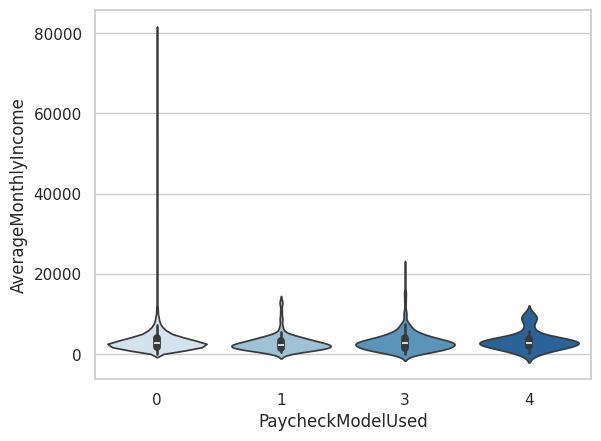

In [ ]:
sns.violinplot(x='PaycheckModelUsed', y='AverageMonthlyIncome', data=df, palette='Blues')

<ipython-input-319-8549005d4360>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AverageNumberOfTransactionsADay', data=df, palette="blend:#7AB,#EDA")


<Axes: xlabel='AverageNumberOfTransactionsADay'>

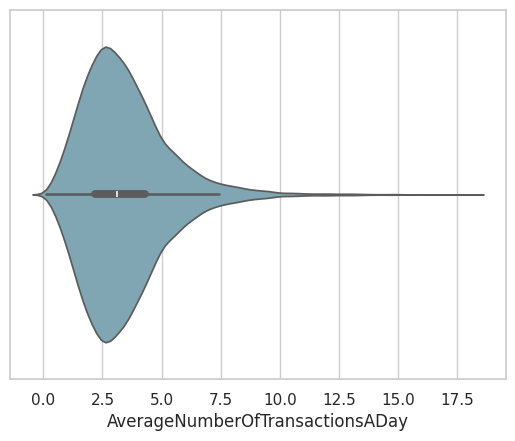

In [ ]:
sns.violinplot(x='AverageNumberOfTransactionsADay', data=df, palette="blend:#7AB,#EDA")

<Axes: ylabel='AveragePotentialMonthlyIncome'>

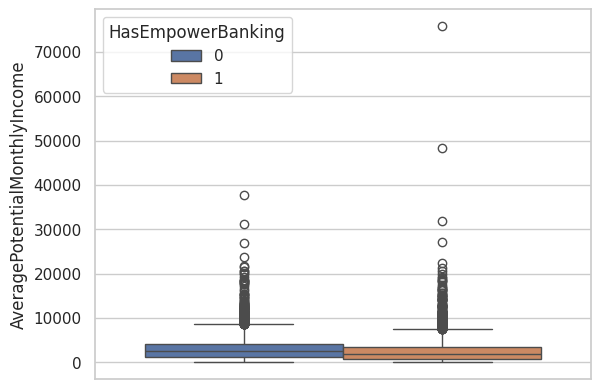

In [ ]:
sns.boxplot(y ='AveragePotentialMonthlyIncome', data=df, hue='HasEmpowerBanking')

<Axes: ylabel='AverageNumberOfTransactionsADay'>

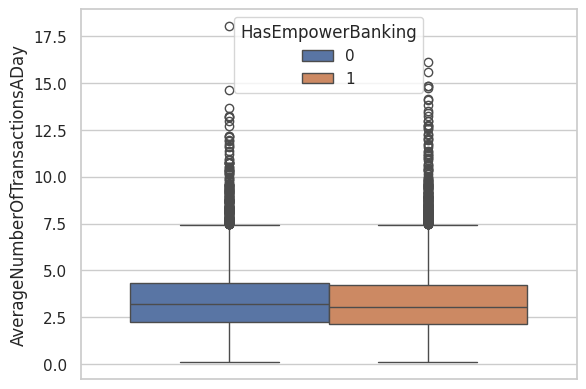

In [ ]:
sns.boxplot(y ='AverageNumberOfTransactionsADay', data=df, hue='HasEmpowerBanking')

<ipython-input-322-1124866cdf18>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CreditAccountCount', y='BalanceAverage', data=df, palette='Blues')


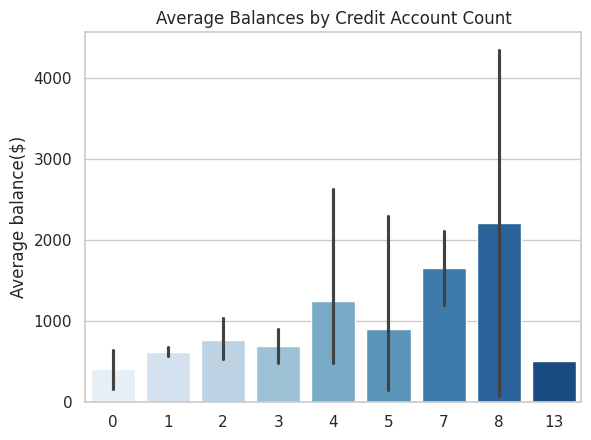

In [ ]:
sns.barplot(x='CreditAccountCount', y='BalanceAverage', data=df, palette='Blues')
plt.xlabel('')
plt.ylabel('Average balance($)')
plt.title('Average Balances by Credit Account Count')
plt.show()

<ipython-input-323-d14465b0a58f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NegativeBalanceCount',data=df,order=negative_balance_order,palette='coolwarm')


<Axes: xlabel='NegativeBalanceCount', ylabel='count'>

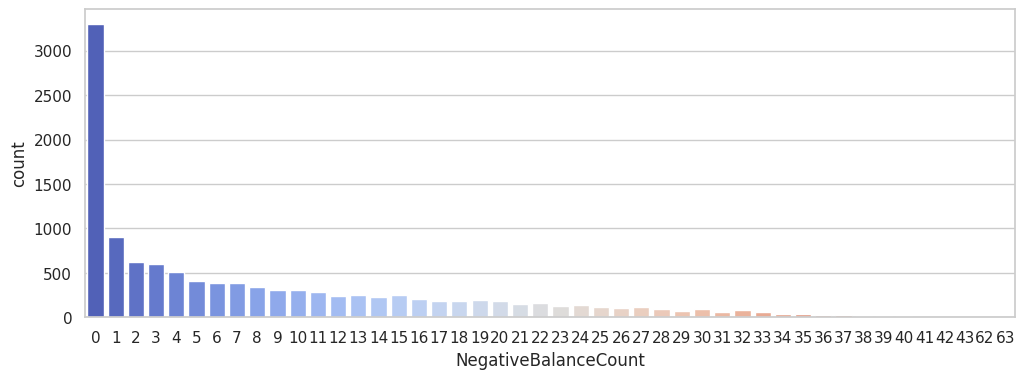

In [ ]:
plt.figure(figsize=(12,4))
negative_balance_order = sorted(df['NegativeBalanceCount'].unique())
sns.countplot(x='NegativeBalanceCount',data=df,order=negative_balance_order,palette='coolwarm')

<Axes: xlabel='NegativeBalanceCount', ylabel='count'>

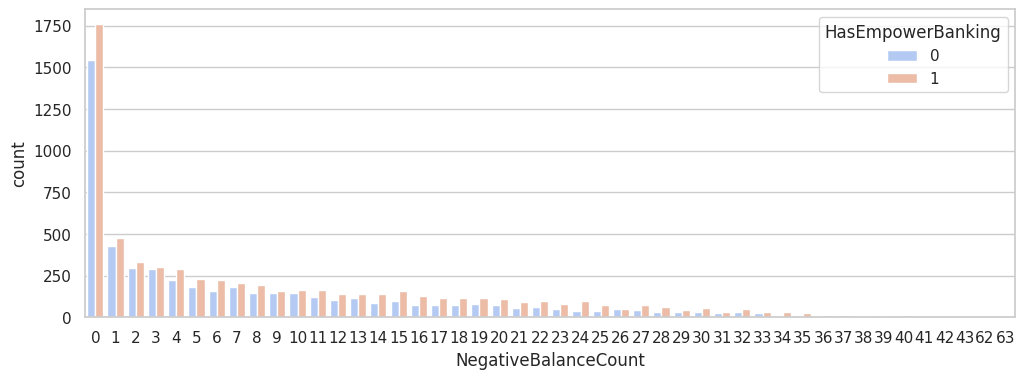

In [ ]:
plt.figure(figsize=(12,4))
negative_balance_order = sorted(df['NegativeBalanceCount'].unique())
sns.countplot(x='NegativeBalanceCount',data=df,order=negative_balance_order,palette='coolwarm',hue='HasEmpowerBanking')

# **SECTION 3: FEATURE ENGINEERING**

**1. Financial Ratios and Metrics**
 - Debt-to-Income Ratio: Ratio of OutstandingCreditDebtWherePayingInterest to AverageMonthlyIncome. It can help assess the risk of default.
 - Savings Rate: Calculate the ratio of savings to income, possibly using TotalCash or BalanceAverage | TotalCash/AverageMonthlyIncome
 - Overdraft Ratio: Create a ratio of OverdraftTotal to CurrentBalance to see the severity of overdraft usage.

**2. Transaction Behavior**
 - Total Transactions: Sum of AverageNumberOfTransactionsADayPrimaryChecking multiplied by TotalHistoryInDays, which gives an estimate of total
   transactions over the account history.

**3. Balance Features**
 - Balance Fluctuation: Calculate the standard deviation of daily balances to capture variability in balance behavior:
   {Balance Fluctuation} = {std}(Bal4100, Bal3100, Bal2100)
 - Bounce Rate: If applicable, this can be derived from NegativeBalanceCount relative to the total number of transactions.

**4. Spending and Income Insights**
 - Net Discretionary Income: Calculate the difference between AverageMonthlyIncome and AverageMonthlyDiscretionarySpend to understand how much discretionary
   income remains.
   Net Discretionary Income = AverageMonthlyIncome - AverageMonthlyDiscretionarySpend
 - Income to Spend Ratio: Provides insights into spending patterns
   Income to Spend Ratio = AverageMonthlyIncome/AverageMonthlySpend

**5. Time-Related Features**
 - Average Days Between Repayments: Calculate the average time between payments based on TotalHistoryInDays divided by the number of repayments.
 - Recent Payment Behavior: Create a binary feature that indicates if the last repayment amount is less than a certain percentage (e.g., 50%) of
   AverageMonthlyIncome.

**6. Account Diversity Features**
 - Account Diversity: Calculate the total number of accounts (checking + savings + credit) and categorize them into tiers:
   Account Diversity = CheckingAccountCount + SavingsAccountCount + CreditAccountCount
 - Ratio of Credit to Total Accounts: Measure reliance on credit accounts
   Credit to Asset Ratio = CreditAccountCount/(CreditAccounts + CheckingAccountCount + SavingsAccountCount)

**7. Risk Indicators**
 - Late Fee Trends: Create features to track average late fees (e.g. LatefeesTotalCount/TotalHistoryInDays) indicating consistency.
 - Advances Default Risk: Create a ratio such as DefaultedAdvances divided by the total advances to assess risk.

In [ ]:
df.columns

Index(['DefaultedAdvances', 'AdvanceAmount', 'CurrentBalance',
       'LatefeesTotalCount', 'LastRepaymentAmount', 'OverdraftCount',
       'OverdraftTotal', 'AverageMonthlySpend', 'BalanceAverage', 'BalanceMin',
       'TotalAssets', 'AverageNumberOfTransactionsADay', 'TotalCash',
       'LatefeesCount', 'Paycheck', 'TotalHistoryInDays',
       'AverageMonthlyIncome', 'AverageMonthlyDiscretionarySpend',
       'CheckingAccountCount', 'CreditAccountCount', 'SavingsAccountCount',
       'OutstandingCreditDebtWherePayingInterest',
       'AverageNumberOfTransactionsADayPrimaryChecking',
       'NegativeBalanceCount', 'Bal4100', 'Bal3100', 'Bal2100', 'Bal450',
       'Bal350', 'Bal250', 'PaycheckModelUsed', 'NumberOfMatches', 'ErrorRate',
       'IsNameBased', 'BalanceAbove100L30Count',
       'AveragePotentialMonthlyIncome', 'HasEmpowerBanking'],
      dtype='object')

In [ ]:
#Financial Ratios
df['debt-to-income'] = df['OutstandingCreditDebtWherePayingInterest']/df['AverageMonthlyIncome']
df['savings_rate'] = df['TotalCash']/df['AverageMonthlyIncome']

#Transaction Behavior
df['total_transactions'] = df['AverageNumberOfTransactionsADayPrimaryChecking']*df['TotalHistoryInDays']
df['bounce_rate'] = df['NegativeBalanceCount']/df['total_transactions']

#Spending and Income Insights
df['net_discretionary_income'] =  df['AverageMonthlyIncome'] - df['AverageMonthlyDiscretionarySpend']
df['income-to-spend'] = df['AverageMonthlyIncome']/df['AverageMonthlyDiscretionarySpend']

#Time-Related Features
df['recent_payment_behavior'] = df['LastRepaymentAmount']/df['AverageMonthlyIncome']

#Account Diversity Features
df['Account_Diversity'] = df['CheckingAccountCount'] + df['SavingsAccountCount'] + df['CreditAccountCount']
df['credit-to-total-accounts'] = df['CreditAccountCount']/df['Account_Diversity']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 46 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   DefaultedAdvances                               11808 non-null  object 
 1   AdvanceAmount                                   11808 non-null  int64  
 2   CurrentBalance                                  11808 non-null  float64
 3   LatefeesTotalCount                              11808 non-null  int64  
 4   LastRepaymentAmount                             11808 non-null  float64
 5   OverdraftCount                                  11808 non-null  int64  
 6   OverdraftTotal                                  11808 non-null  int64  
 7   AverageMonthlySpend                             11808 non-null  float64
 8   BalanceAverage                                  11808 non-null  float64
 9   BalanceMin                             

In [ ]:
for column in df.columns:
    nan_count = df[column].isnull().sum()
    if nan_count > 0:
        print(f"{column} contains {nan_count} NaN value(s)")
    else:
        print(f"{column} does not contain any NaN values")

DefaultedAdvances does not contain any NaN values
AdvanceAmount does not contain any NaN values
CurrentBalance does not contain any NaN values
LatefeesTotalCount does not contain any NaN values
LastRepaymentAmount does not contain any NaN values
OverdraftCount does not contain any NaN values
OverdraftTotal does not contain any NaN values
AverageMonthlySpend does not contain any NaN values
BalanceAverage does not contain any NaN values
BalanceMin does not contain any NaN values
TotalAssets does not contain any NaN values
AverageNumberOfTransactionsADay does not contain any NaN values
TotalCash does not contain any NaN values
LatefeesCount does not contain any NaN values
Paycheck does not contain any NaN values
TotalHistoryInDays does not contain any NaN values
AverageMonthlyIncome does not contain any NaN values
AverageMonthlyDiscretionarySpend does not contain any NaN values
CheckingAccountCount does not contain any NaN values
CreditAccountCount does not contain any NaN values
SavingsA

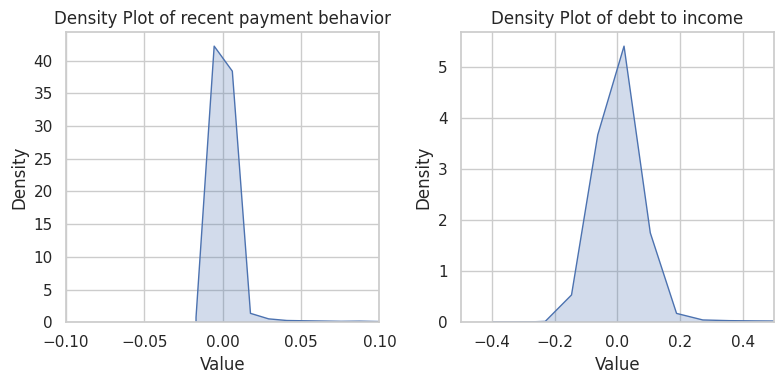

In [ ]:
# Create 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Adjust the figsize as needed

# Plot density plots in each subplot
sns.kdeplot(df['recent_payment_behavior'], fill=True, ax=axs[0])
axs[0].set_title('Density Plot of recent payment behavior')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Density')
# Set the limits of x-axis
axs[0].set_xlim(-0.1, 0.1)

sns.kdeplot(df['debt-to-income'], fill=True, ax=axs[1])
axs[1].set_title('Density Plot of debt to income')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Density')
# Set the limits of x-axis
axs[1].set_xlim(-0.5, 0.5)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df['recent_payment_behavior'].fillna(df['recent_payment_behavior'].median(), inplace=True)
df['debt-to-income'].fillna(df['debt-to-income'].median(), inplace=True)

<ipython-input-330-11e60e94b275>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['recent_payment_behavior'].fillna(df['recent_payment_behavior'].median(), inplace=True)
<ipython-input-330-11e60e94b275>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [ ]:
print("The number of null values in the recent payment behavior column is: ", df['recent_payment_behavior'].isnull().sum())
print("The number of null values in the debt to income behavior column is: ", df['debt-to-income'].isnull().sum())

The number of null values in the recent payment behavior column is:  0
The number of null values in the debt to income behavior column is:  0


In [ ]:
df.head()

,DefaultedAdvances,AdvanceAmount,CurrentBalance,LatefeesTotalCount,LastRepaymentAmount,OverdraftCount,OverdraftTotal,AverageMonthlySpend,BalanceAverage,BalanceMin,...,HasEmpowerBanking,debt-to-income,savings_rate,total_transactions,bounce_rate,net_discretionary_income,income-to-spend,recent_payment_behavior,Account_Diversity,credit-to-total-accounts
0,0,50,268.10,0,0.0,0,0,-5491.060000,345.11,-185.34,...,1,0.0,0.067541,283.466745,0.038805,5160.731181,-3.332126,0.0,2,0.0
1,0,50,17.68,0,0.0,0,0,-1330.759925,378.01,0.08,...,0,0.0,0.015814,613.131410,0.000000,2623.706790,-0.745414,0.0,3,0.0
2,0,50,0.79,0,0.0,0,0,-6446.753876,559.13,-276.61,...,1,0.0,0.041050,1989.556992,0.010052,8221.090619,-4.315853,0.0,2,0.0
3,0,50,-12.83,0,0.0,0,0,-1904.714237,124.86,-44.62,...,0,0.0,0.360958,780.120715,0.019228,2727.858378,-1.900074,0.0,2,0.0
4,0,50,55.88,0,0.0,0,0,-5857.241057,420.26,42.50,...,1,0.0,0.010810,1481.769669,0.000000,7062.903549,-2.730210,0.0,1,0.0


# **SECTION 4: TRAIN-TEST-SPLIT AND DATA CLEANSING**

In [ ]:
df.shape

(11808, 46)

In [ ]:
X = df.drop('DefaultedAdvances', axis=1).values
y = df['DefaultedAdvances'].values

In [ ]:
# Check for NaNs
print("NaNs in data:", np.isnan(X).any())
# Check for infinite values
print("Infs in data:", np.isinf(X).any())

NaNs in data: False
Infs in data: True


In [ ]:
#Perform a train/test split with test_size=0.2 and a random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
#Replace positive and negative infinity with NaN
X_train[np.isinf(X_train)] = np.nan
X_test[np.isinf(X_test)] = np.nan

# Check for NaN and infinite values again
print(np.isnan(X_train).any(), np.isinf(X_train).any())
print(np.isnan(X_test).any(), np.isinf(X_test).any())

True False
True False


In [ ]:
from sklearn.impute import SimpleImputer

# Impute NaN values
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Check for NaN and infinite values again after imputation
print(np.isnan(X_train).any())  # Check if NaN is present in training data
print(np.isinf(X_train).any())  # Check if Inf is present in training data
print(np.isnan(X_test).any())   # Check if NaN is present in testing data
print(np.isinf(X_test).any())   # Check if Inf is present in testing data

False
False
False
False


In [ ]:
print(y_train.shape, y_train.dtype)
print(y_test.shape, y_test.dtype)

(9446,) object
(2362,) object


In [ ]:
#Flatten the Target Output
y_train = y_train.flatten()  #Converts from (num_samples, 1) to (num_samples,)
y_test = y_test.flatten()    #Converts from (num_samples, 1) to (num_samples,)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

**Normalizing the Data using a MinMaxScaler to normalize the feature data X_train and X_test**

In [ ]:
# Scale the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Print data shapes
print("X_train shape:", X_train.shape)                # Should be (num_samples, 45)
print("X_test shape:", X_test.shape)                  # Should be (num_samples, 45)
print("y_train shape:", y_train.shape)                # Should be (num_samples,)
print("y_test shape:", y_test.shape)                  # Should be (num_samples,)

X_train shape: (9446, 45)
X_test shape: (2362, 45)
y_train shape: (9446,)
y_test shape: (2362,)


In [ ]:
#Verify Data Types
print("X_train dtype:", X_train.dtype)   # Should typically be float32
print("y_train dtype:", y_train.dtype)   # Should be int (for labels)

X_train dtype: float32
y_train dtype: object


In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('int')

# **SECTION 5: MODEL CREATION | MULTIPLE CANDIDATE MODELS**

# **1. Importing necessary libraries**

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score

# **2. Perform a k-fold cross-validation**

**K-Fold Cross Validation**

The k-fold cross-validation is a procedure used to estimate the skill of the model on new data.

K-fold cross validating works by splitting the dataset to a specified number of folds (say 5) and then shifting the position of the test set to a single fold at each iteration (as described above)

After performing the K-fold cross-validation, we then end up with the N number of the same dataset with N different training and testing sets (where N is the number of splits applied on the dataset)

By splitting the dataset into a training and test set across 5 different instances, we try to maximize the use of the available data for training and testing the model.

In [ ]:
# KFold
empower_kf = KFold(n_splits=5, shuffle=True, random_state=42)

# **3. Elect candidate models**

Now that I have successfully split our dataset in 5 K-Folds, we can proceed to elect the candidate models.

Since this is a very small dataset (< 12,000 rows), I'll be electing the LogisticRegression, SVC, KNN, and RandomForestClassifier.

Now that I've decided on the machine learning (ML) models, we can proceed to evaluate the models with our dataset using cross-validation.

I would make use of the sklearn.model_selection.cross_val_score to cross-validate the dataset and get the scores on the model performance across each fold.

In [ ]:
def model_performance(X, y, *models):
    record = {'Logistic Regression': {},'K-Nearest Neighbor': {},'Random Forest Classifier': {},'Support Vector Classifier': {},}
    avg_model_performance = []

    for model, name in zip(models, record.keys()):
        try:
            scores = cross_val_score(model, X, y, cv=empower_kf, scoring='accuracy')
            record[name]['scores'] = scores
            record[name]['mean_score'] = scores.mean()
            avg_model_performance.append((round(float(scores.mean()) * 100, 2), name))
        except Exception as e:
            record[name]['error'] = str(e)
    record['Model Performance Rating'] = sorted(avg_model_performance, reverse=True)
    return record

In [ ]:
# Run model performance evaluation
record = model_performance(X_train, y_train,
                           LogisticRegression(max_iter=1000),
                           KNeighborsClassifier(),
                           RandomForestClassifier(),
                           SVC())

In [ ]:
# Print the results
print(record)

{'Logistic Regression': {'scores': array([0.77037037, 0.77342509, 0.77448385, 0.77448385, 0.76389624]), 'mean_score': 0.771331882438288}, 'K-Nearest Neighbor': {'scores': array([0.73809524, 0.74166226, 0.74642668, 0.7268396 , 0.73901535]), 'mean_score': 0.7384078247498047}, 'Random Forest Classifier': {'scores': array([0.77989418, 0.7787189 , 0.78030704, 0.77660138, 0.76760191]), 'mean_score': 0.7766246803409323}, 'Support Vector Classifier': {'scores': array([0.77089947, 0.776072  , 0.77183695, 0.77289571, 0.76601376]), 'mean_score': 0.7715435786690419}, 'Model Performance Rating': [(77.66, 'Random Forest Classifier'), (77.15, 'Support Vector Classifier'), (77.13, 'Logistic Regression'), (73.84, 'K-Nearest Neighbor')]}


In [ ]:
for model in list(record.keys())[:-1]:
    print(model, record[model])

Logistic Regression {'scores': array([0.77037037, 0.77342509, 0.77448385, 0.77448385, 0.76389624]), 'mean_score': 0.771331882438288}
K-Nearest Neighbor {'scores': array([0.73809524, 0.74166226, 0.74642668, 0.7268396 , 0.73901535]), 'mean_score': 0.7384078247498047}
Random Forest Classifier {'scores': array([0.77989418, 0.7787189 , 0.78030704, 0.77660138, 0.76760191]), 'mean_score': 0.7766246803409323}
Support Vector Classifier {'scores': array([0.77089947, 0.776072  , 0.77183695, 0.77289571, 0.76601376]), 'mean_score': 0.7715435786690419}


In [ ]:
#Best Performing Models
record['Model Performance Rating']

[(77.66, 'Random Forest Classifier'),
 (77.15, 'Support Vector Classifier'),
 (77.13, 'Logistic Regression'),
 (73.84, 'K-Nearest Neighbor')]

After cross-validating the dataset we can now conclude that the best performing model is the Random Forest Classifier with an accuracy of 77.66% followed by the Support Vector Classifier and Logistic Regression model with an accuracy of 77.15% and 77.35% respectively.

This implies that either of them would be efficient for deployment.

# **SECTION 6: MODEL CREATION | USING KERAS**

In [ ]:
# Ensure target variable is converted correctly
y_train = y_train.astype('int')  # Convert y_train to be of integer type
y_test = y_test.astype('int')     # Convert y_test similarly

# Check if they are numeric and free of NaNs and Infs
print("y_train unique values:", np.unique(y_train))
print("y_test unique values:", np.unique(y_test))
print("NaNs in y_train:", np.isnan(y_train).any())
print("Infs in y_train:", np.isinf(y_train).any())
print("NaNs in y_test:", np.isnan(y_test).any())
print("Infs in y_test:", np.isinf(y_test).any())

y_train unique values: [0 1]
y_test unique values: [0 1]
NaNs in y_train: False
Infs in y_train: False
NaNs in y_test: False
Infs in y_test: False


In [ ]:
model = Sequential()
# input layer
model.add(Dense(36, activation='relu', input_shape=(45,)))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(units=1,activation='sigmoid')) #Binary classification
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Ensure y_train is flattened
y_train = y_train.flatten()
#Fitting the model
history = model.fit(X_train, y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 834ms/step - accuracy: 0.6429 - loss: 0.6412 - val_accuracy: 0.7743 - val_loss: 0.5264
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7680 - loss: 0.5469 - val_accuracy: 0.7743 - val_loss: 0.5157
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7775 - loss: 0.5247 - val_accuracy: 0.7743 - val_loss: 0.5125
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7785 - loss: 0.5222 - val_accuracy: 0.7743 - val_loss: 0.5060
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7709 - loss: 0.5269 - val_accuracy: 0.7743 - val_loss: 0.5015
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7707 - loss: 0.5193 - val_accuracy: 0.7743 - val_loss: 0.4992
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7704 - loss: 0.5222 - val_accuracy: 0.7743 - val_loss: 0.5008
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7700 - loss: 0.5152 - val_accuracy: 0.7743 - val_l

In [ ]:
# Check the keys of the history to verify validation loss keys
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 36)                  │           1,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 39)                  │           1,443 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 39)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 19)                  │             760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,639 (45.47 KB)

 Trainable params: 3,879 (15.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,760 (30.32 KB)

# **SECTION 7: MODEL EVALUATION**

<Axes: >

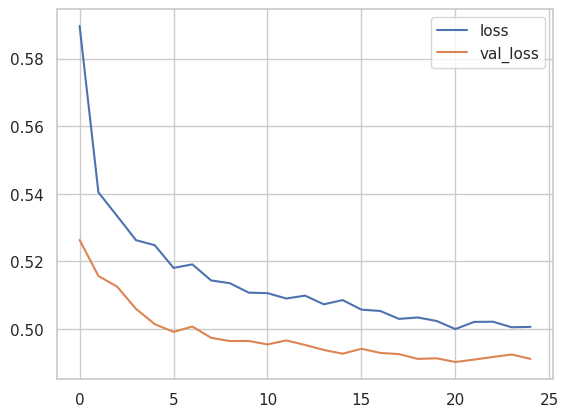

In [ ]:
#Plot out the validation loss versus the training loss.
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1829
           1       0.69      0.02      0.03       533

    accuracy                           0.78      2362
   macro avg       0.73      0.51      0.45      2362
weighted avg       0.76      0.78      0.68      2362



In [ ]:
confusion_matrix(y_test,predictions)

array([[1825,    4],
       [ 524,    9]])

**Testing | Given the customer below, should Empower offer this person an initial cash advance?**

In [ ]:
random.seed(108)
random_ind = random.randint(0,len(df))

new_customer = df.drop('DefaultedAdvances',axis=1).iloc[random_ind]
new_customer

,2138
AdvanceAmount,50.000000
CurrentBalance,36.160000
LatefeesTotalCount,0.000000
LastRepaymentAmount,0.000000
OverdraftCount,0.000000
OverdraftTotal,0.000000
AverageMonthlySpend,-1924.779270
BalanceAverage,172.580000
BalanceMin,-41.750000
TotalAssets,37.550000


In [ ]:
predictions_1 = model.predict(new_customer.values.reshape(1,45))
predictions_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[0.]], dtype=float32)

In [ ]:
df.iloc[random_ind]['DefaultedAdvances']

'0'